# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.7.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

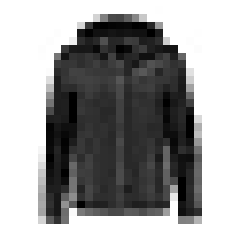

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

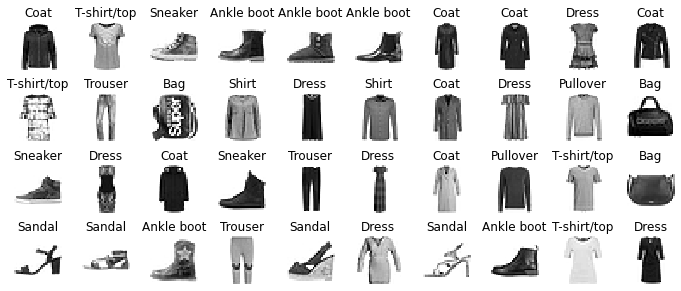

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer(hidden1.name) is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[ 0.01972207, -0.0145672 , -0.05803727, ..., -0.00183461,
         0.01040527, -0.0432558 ],
       [ 0.02371603,  0.02106994, -0.02706497, ...,  0.03094663,
        -0.0247922 , -0.01978599],
       [ 0.06951731,  0.03129193,  0.06584999, ..., -0.07044216,
         0.03777549, -0.0273945 ],
       ...,
       [-0.01230622,  0.01060139,  0.06947446, ..., -0.02505284,
         0.0691504 , -0.05208125],
       [-0.05416153, -0.03094661, -0.04424406, ..., -0.06679036,
        -0.06672392,  0.05018248],
       [-0.07059111, -0.03820666,  0.06252676, ...,  0.01024907,
         0.05903284,  0.0362119 ]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [29]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7159 - accuracy: 0.7605 - val_loss: 0.5017 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4886 - accuracy: 0.8282 - val_loss: 0.4488 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4436 - accuracy: 0.8445 - val_loss: 0.4225 - val_accuracy: 0.8558
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4156 - accuracy: 0.8534 - val_loss: 0.4063 - val_accuracy: 0.8548
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3967 - accuracy: 0.8606 - val_loss: 0.3812 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3807 - accuracy: 0.8656 - val_loss: 0.3860 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3679 - accuracy: 0.8699 - val_loss: 0.3647 - val_accuracy:

In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

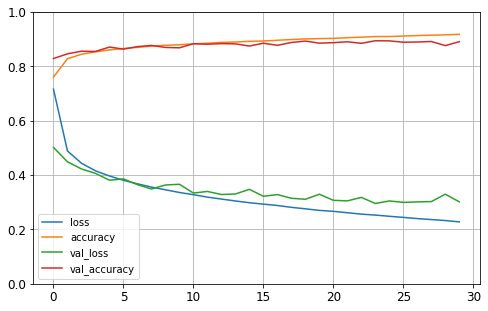

In [33]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3312 - accuracy: 0.8837


[0.3311777710914612, 0.8837000131607056]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

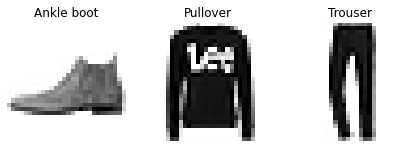

In [42]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

Solution

1) With Adam Optimizer

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [44]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.3796 - accuracy: 0.8620 - val_loss: 0.3969 - val_accuracy: 0.8562
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3324 - accuracy: 0.8773 - val_loss: 0.3515 - val_accuracy: 0.8726
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3097 - accuracy: 0.8856 - val_loss: 0.3126 - val_accuracy: 0.8802
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2906 - accuracy: 0.8927 - val_loss: 0.3263 - val_accuracy: 0.8808
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2762 - accuracy: 0.8965 - val_loss: 0.3060 - val_accuracy: 0.8898
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2622 - accuracy: 0.9023 - val_loss: 0.3116 - val_accuracy: 0.8900
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2519 - accuracy: 0.9057 - val_loss: 0.3328 - val_accuracy

plot learning curves

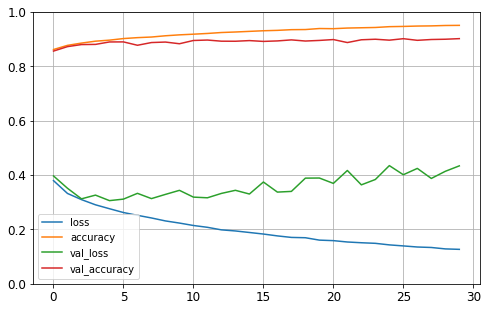

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 2) Plot Learning curves when using different batch size

we gonna try to fit the medel with 50 batchs

In [46]:
history = model.fit(X_train, y_train, batch_size=50, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1017 - accuracy: 0.9607 - val_loss: 0.4350 - val_accuracy: 0.9040
Epoch 2/30
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1029 - accuracy: 0.9605 - val_loss: 0.4444 - val_accuracy: 0.8998
Epoch 3/30
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1021 - accuracy: 0.9604 - val_loss: 0.4343 - val_accuracy: 0.9024
Epoch 4/30
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0995 - accuracy: 0.9618 - val_loss: 0.4442 - val_accuracy: 0.9020
Epoch 5/30
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0994 - accuracy: 0.9613 - val_loss: 0.4762 - val_accuracy: 0.9020
Epoch 6/30
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0952 - accuracy: 0.9637 - val_loss: 0.4761 - val_accuracy: 0.9014
Epoch 7/30
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0941 - accuracy: 0.9634 - val_loss: 0.5331 - val_accuracy:

plot learning curves

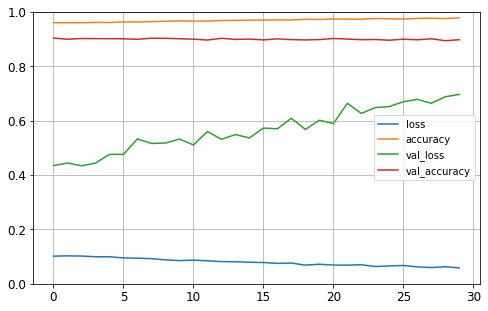

In [47]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 3) Plot Learning curves when using different number of epochs


we gonna try to fit the model with a less number of epochs then we saw earlier, we choose a number of epochs equal to 20 and we see the differece

Epoch 1/20
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0592 - accuracy: 0.9779 - val_loss: 0.6570 - val_accuracy: 0.9020
Epoch 2/20
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0580 - accuracy: 0.9775 - val_loss: 0.6885 - val_accuracy: 0.8992
Epoch 3/20
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0570 - accuracy: 0.9785 - val_loss: 0.6989 - val_accuracy: 0.8996
Epoch 4/20
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0541 - accuracy: 0.9789 - val_loss: 0.7405 - val_accuracy: 0.8978
Epoch 5/20
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0562 - accuracy: 0.9790 - val_loss: 0.7366 - val_accuracy: 0.8942
Epoch 6/20
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0519 - accuracy: 0.9806 - val_loss: 0.6800 - val_accuracy: 0.8996
Epoch 7/20
1100/1100 [==============================] - 8s 7ms/step - loss: 0.0545 - accuracy: 0.9798 - val_loss: 0.7249 - val_accuracy:

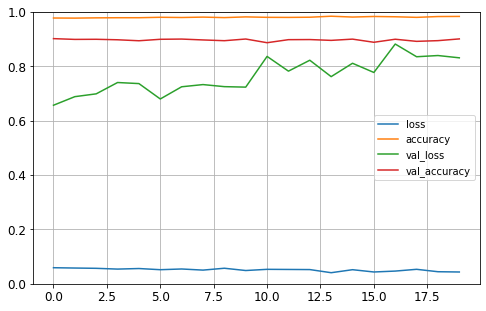

In [48]:
history = model.fit(X_train, y_train, batch_size=50, epochs=20,#change epochs value
                    validation_data=(X_valid, y_valid))
#plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

we notice that the more we reduce the number of epochs, the more the loss on the validation data decreases

#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.

In [49]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
    keras.layers.Dense(10, activation="softmax")])

In [51]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 1.4897 - accuracy: 0.5320 - val_loss: 1.0974 - val_accuracy: 0.5874
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9921 - accuracy: 0.6266 - val_loss: 0.8637 - val_accuracy: 0.6670
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8306 - accuracy: 0.6668 - val_loss: 0.7549 - val_accuracy: 0.6812
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7372 - accuracy: 0.6969 - val_loss: 0.6797 - val_accuracy: 0.7058
Epoch 5/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.6711 - accuracy: 0.7186 - val_loss: 0.6313 - val_accuracy: 0.7332
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6326 - accuracy: 0.7285 - val_loss: 0.6067 - val_accuracy: 0.7334
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5997 - accuracy: 0.7464 - val_loss: 0.5733 - val_accur

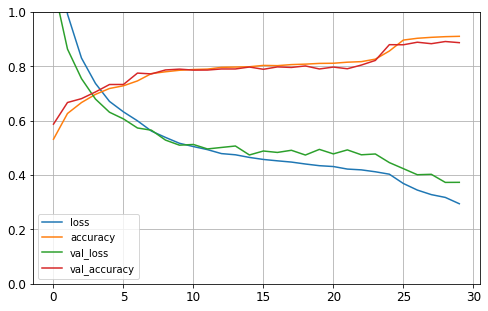

In [52]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
#plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

by adding a Dense Layer with a dropout layer, we have eliminated the overfitting

#### 5) Use Batch Normalisation

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 1.5286 - accuracy: 0.4571 - val_loss: 1.2245 - val_accuracy: 0.4740
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 1.1642 - accuracy: 0.4762 - val_loss: 1.1134 - val_accuracy: 0.5012
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 1.0542 - accuracy: 0.5352 - val_loss: 0.9989 - val_accuracy: 0.5502
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.9929 - accuracy: 0.5492 - val_loss: 0.9621 - val_accuracy: 0.5506
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.9712 - accuracy: 0.5503 - val_loss: 0.9450 - val_accuracy: 0.5458
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9836 - accuracy: 0.5461 - val_loss: 0.9343 - val_accuracy: 0.5574
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9890 - accuracy: 0.5530 - val_loss: 0.9527 - val_ac

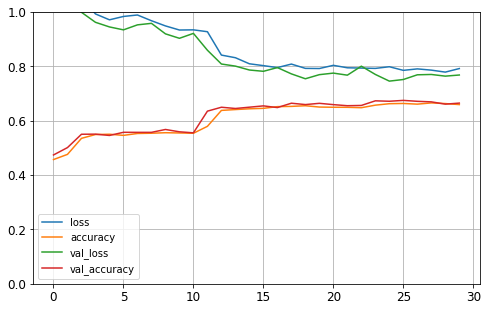

In [53]:

#Add a batchNormalization 
model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
    keras.layers.Dense(10, activation="softmax")])
#compile the model with adam optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
#fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
#plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

the training process of a neural network has been accelerated.